In [116]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [117]:
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
print(os.path.exists("/content/drive/MyDrive/ІТ Смарт-систем/ПР2/variant_3.csv"))

True


In [120]:
ds = pd.read_csv("/content/drive/MyDrive/ІТ Смарт-систем/ПР2/variant_3.csv")
original_ds = ds.copy()

In [121]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  26 

columns:  ['Unnamed: 0', 'Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed', 'ColorName_x', 'ColorName_y', 'ColorName', 'BreedName_x', 'BreedName_y', 'StateName_x']


In [122]:
ds.shape

(1356, 26)

In [123]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Name 111
Gender 67
MaturitySize 135
ColorName 207
BreedName_x 148
BreedName_y 135


In [124]:
def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [125]:
missing_cols = sorted(ds.columns[ds.isnull().any()].tolist(), key=lambda col: ds[col].isnull().sum(), reverse=True)
num_rows = ds.shape[0]

print(f'Кількість відсутніх значень у стовпцях:\n')
for col in missing_cols:
    print(f'{col:18} - {ds[col].isnull().sum():4} ({ds[col].isnull().sum() / num_rows:.1%})')

Кількість відсутніх значень у стовпцях:

ColorName          -  207 (15.3%)
BreedName_x        -  148 (10.9%)
MaturitySize       -  135 (10.0%)
BreedName_y        -  135 (10.0%)
Name               -  111 (8.2%)
Gender             -   67 (4.9%)


In [126]:
random_sample_cols = [col for col in missing_cols if ds[col].isnull().sum() / num_rows < 0.05]
adding_cat_cols = [col for col in missing_cols if ds[col].isnull().sum() / num_rows > 0.05]
print(random_sample_cols)
print(adding_cat_cols)

['Gender']
['ColorName', 'BreedName_x', 'MaturitySize', 'BreedName_y', 'Name']


In [127]:
for col in random_sample_cols:
    random_sample_train = ds[col].dropna().sample(ds[col].isnull().sum(), random_state=0)
    random_sample_train.index = ds[ds[col].isnull()].index
    ds.loc[ds[col].isnull(), col] = random_sample_train

In [128]:
for col in adding_cat_cols:
    ds[col].fillna('Missing', inplace=True)

In [129]:
print(ds.isnull().sum().sum())

0


In [130]:
obj_cols = ds.select_dtypes(include='object').columns.tolist()
ds[obj_cols].nunique().sort_values(ascending=False)

PetID           1356
Description     1323
Name            1149
RescuerID        819
BreedName_x       95
BreedName_y       87
StateName_x       12
ColorName          6
MaturitySize       5
ColorName_x        5
ColorName_y        5
dtype: int64

In [131]:
ordinal_cols = [col for col in obj_cols if ds[col].nunique() == 2]
one_hot_cols = ['MaturitySize', 'ColorName_x', 'ColorName_y', 'ColorName', 'BreedName_x', 'BreedName_y', 'StateName_x',"Type","Gender","FurLength","Vaccinated","Dewormed","Sterilized","Health"]

print(ordinal_cols)

[]


In [133]:
missing_cols = sorted(ds.columns[ds.isnull().any()].tolist(), key=lambda col: ds[col].isnull().sum(), reverse=True)
num_rows = ds.shape[0]

print(f'Кількість відсутніх значень у стовпцях:\n')
for col in missing_cols:
    print(f'{col:18} - {ds[col].isnull().sum():4} ({ds[col].isnull().sum() / num_rows:.1%})')



Кількість відсутніх значень у стовпцях:



In [134]:
# let's use one hot encoding for other variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

for col in one_hot_cols:
  ds[col] = ds[col].astype('str')

ohe.fit(ds[one_hot_cols])
ohe_output = ohe.transform(ds[one_hot_cols])
ohe_output = pd.DataFrame(ohe_output)
ohe_output.columns = ohe.get_feature_names_out(one_hot_cols)
ohe_output

,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,BreedName_x_Abyssinian,BreedName_x_American Curl,BreedName_x_American Shorthair,BreedName_x_American Wirehair,BreedName_x_Australian Kelpie,BreedName_x_Balinese,BreedName_x_Basset Hound,BreedName_x_Beagle,BreedName_x_Belgian Shepherd Dog Sheepdog,BreedName_x_Belgian Shepherd Malinois,BreedName_x_Bengal,BreedName_x_Birman,BreedName_x_Black Mouth Cur,BreedName_x_Border Collie,BreedName_x_Boxer,BreedName_x_British Shorthair,BreedName_x_Bull Terrier,BreedName_x_Bullmastiff,BreedName_x_Burmese,BreedName_x_Burmilla,BreedName_x_Calico,BreedName_x_Chihuahua,BreedName_x_Chinese Crested Dog,BreedName_x_Cocker Spaniel,BreedName_x_Corgi,BreedName_x_Dachshund,BreedName_x_Dalmatian,BreedName_x_Dilute Calico,BreedName_x_Dilute Tortoiseshell,BreedName_x_Doberman Pinscher,BreedName_x_Domestic Long Hair,BreedName_x_Domestic Medium Hair,BreedName_x_Domestic Short Hair,BreedName_x_Egyptian Mau,BreedName_x_Extra-Toes Cat (Hemingway Polydactyl),BreedName_x_Flat-coated Retriever,BreedName_x_German Shepherd Dog,BreedName_x_German Spitz,BreedName_x_Glen of Imaal Terrier,BreedName_x_Golden Retriever,BreedName_x_Great Dane,BreedName_x_Himalayan,BreedName_x_Husky,BreedName_x_Irish Terrier,BreedName_x_Jack Russell Terrier,BreedName_x_Japanese Bobtail,BreedName_x_Korat,BreedName_x_Kuvasz,BreedName_x_Labrador Retriever,BreedName_x_Lancashire Heeler,BreedName_x_Maine Coon,BreedName_x_Manx,BreedName_x_Mastiff,BreedName_x_Miniature Pinscher,BreedName_x_Missing,BreedName_x_Mixed Breed,BreedName_x_Norwegian Forest Cat,BreedName_x_Oriental Long Hair,BreedName_x_Oriental Short Hair,BreedName_x_Oriental Tabby,BreedName_x_Pekingese,BreedName_x_Persian,BreedName_x_Pit Bull Terrier,BreedName_x_Pixie-Bob,BreedName_x_Pointer,BreedName_x_Pomeranian,BreedName_x_Poodle,BreedName_x_Pug,BreedName_x_Ragdoll,BreedName_x_Rat Terrier,BreedName_x_Rhodesian Ridgeback,BreedName_x_Rottweiler,BreedName_x_Russian Blue,BreedName_x_Schnauzer,BreedName_x_Setter,BreedName_x_Shar Pei,BreedName_x_Shepherd,BreedName_x_Shetland Sheepdog Sheltie,BreedName_x_Shih Tzu,BreedName_x_Siamese,BreedName_x_Siberian,BreedName_x_Siberian Husky,BreedName_x_Silky Terrier,BreedName_x_Silver,BreedName_x_Singapura,BreedName_x_Snowshoe,BreedName_x_Spitz,BreedName_x_Tabby,BreedName_x_Terrier,BreedName_x_Tiger,BreedName_x_Torbie,BreedName_x_Tortoiseshell,BreedName_x_Toy Fox Terrier,BreedName_x_Tuxedo,BreedName_x_Whippet,BreedName_y_Abyssinian,BreedName_y_Afghan Hound,BreedName_y_American Curl,BreedName_y_American Shorthair,BreedName_y_Applehead Siamese,BreedName_y_Australian Cattle Dog/Blue Heeler,BreedName_y_Australian Terrier,BreedName_y_Basset Hound,BreedName_y_Beagle,BreedName_y_Bengal,BreedName_y_Birman,BreedName_y_Bluetick Coonhound,BreedName_y_Bobtail,BreedName_y_Border Collie,BreedName_y_British Shorthair,BreedName_y_Bullmastiff,BreedName_y_Burmese,BreedName_y_Calico,BreedName_y_Cavalier King Charles Spaniel,BreedName_y_Chartreux,BreedName_y_Cocker Spaniel,BreedName_y_Collie,BreedName_y_Dachshund,BreedName_y_Dalmatian,BreedName_y_Dilute Tortoiseshell,BreedName_y_Doberman Pinscher,BreedName_y_Domestic Long Hair,BreedName_y_Domestic Medium Hair,BreedName_y_Domestic Short Hair,BreedName_y_Egyptian Mau,BreedName_y_Exotic Shorthair,BreedName_y_Finnish Spitz,BreedName_y_Fox Terrier,BreedName_y_German Shepherd Dog,BreedName_y_German Shorthaired Pointer,BreedName_y_Golden Retriever,BreedName_y_Harrier,BreedName_y_Hound,BreedName_y_Husky,BreedName_y_Jack Russell Terrier,BreedName_y_Jack Russell Terrier (Parson Russell Terrier),BreedName_y_Japanese Bobtail,BreedName_y_Labrador Retriever,BreedName_y_Lowchen,BreedName_y_Maine Coon,BreedName_y_Maltese,

In [135]:
ds = ds.drop(one_hot_cols, axis=1)
ds_trimmed = pd.concat([ds, ohe_output], axis=1)

In [136]:
ds_trimmed

,Unnamed: 0,Name,Age,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,BreedName_x_Abyssinian,BreedName_x_American Curl,BreedName_x_American Shorthair,BreedName_x_American Wirehair,BreedName_x_Australian Kelpie,BreedName_x_Balinese,BreedName_x_Basset Hound,BreedName_x_Beagle,BreedName_x_Belgian Shepherd Dog Sheepdog,BreedName_x_Belgian Shepherd Malinois,BreedName_x_Bengal,BreedName_x_Birman,BreedName_x_Black Mouth Cur,BreedName_x_Border Collie,BreedName_x_Boxer,BreedName_x_British Shorthair,BreedName_x_Bull Terrier,BreedName_x_Bullmastiff,BreedName_x_Burmese,BreedName_x_Burmilla,BreedName_x_Calico,BreedName_x_Chihuahua,BreedName_x_Chinese Crested Dog,BreedName_x_Cocker Spaniel,BreedName_x_Corgi,BreedName_x_Dachshund,BreedName_x_Dalmatian,BreedName_x_Dilute Calico,BreedName_x_Dilute Tortoiseshell,BreedName_x_Doberman Pinscher,BreedName_x_Domestic Long Hair,BreedName_x_Domestic Medium Hair,BreedName_x_Domestic Short Hair,BreedName_x_Egyptian Mau,BreedName_x_Extra-Toes Cat (Hemingway Polydactyl),BreedName_x_Flat-coated Retriever,BreedName_x_German Shepherd Dog,BreedName_x_German Spitz,BreedName_x_Glen of Imaal Terrier,BreedName_x_Golden Retriever,BreedName_x_Great Dane,BreedName_x_Himalayan,BreedName_x_Husky,BreedName_x_Irish Terrier,BreedName_x_Jack Russell Terrier,BreedName_x_Japanese Bobtail,BreedName_x_Korat,BreedName_x_Kuvasz,BreedName_x_Labrador Retriever,BreedName_x_Lancashire Heeler,BreedName_x_Maine Coon,BreedName_x_Manx,BreedName_x_Mastiff,BreedName_x_Miniature Pinscher,BreedName_x_Missing,BreedName_x_Mixed Breed,BreedName_x_Norwegian Forest Cat,BreedName_x_Oriental Long Hair,BreedName_x_Oriental Short Hair,BreedName_x_Oriental Tabby,BreedName_x_Pekingese,BreedName_x_Persian,BreedName_x_Pit Bull Terrier,BreedName_x_Pixie-Bob,BreedName_x_Pointer,BreedName_x_Pomeranian,BreedName_x_Poodle,BreedName_x_Pug,BreedName_x_Ragdoll,BreedName_x_Rat Terrier,BreedName_x_Rhodesian Ridgeback,BreedName_x_Rottweiler,BreedName_x_Russian Blue,BreedName_x_Schnauzer,BreedName_x_Setter,BreedName_x_Shar Pei,BreedName_x_Shepherd,BreedName_x_Shetland Sheepdog Sheltie,BreedName_x_Shih Tzu,BreedName_x_Siamese,BreedName_x_Siberian,BreedName_x_Siberian Husky,BreedName_x_Silky Terrier,BreedName_x_Silver,BreedName_x_Singapura,BreedName_x_Snowshoe,BreedName_x_Spitz,BreedName_x_Tabby,BreedName_x_Terrier,BreedName_x_Tiger,BreedName_x_Torbie,BreedName_x_Tortoiseshell,BreedName_x_Toy Fox Terrier,BreedName_x_Tuxedo,BreedName_x_Whippet,BreedName_y_Abyssinian,BreedName_y_Afghan Hound,BreedName_y_American Curl,BreedName_y_American Shorthair,BreedName_y_Applehead Siamese,BreedName_y_Australian Cattle Dog/Blue Heeler,BreedName_y_Australian Terrier,BreedName_y_Basset Hound,BreedName_y_Beagle,BreedName_y_Bengal,BreedName_y_Birman,BreedName_y_Bluetick Coonhound,BreedName_y_Bobtail,BreedName_y_Border Collie,BreedName_y_British Shorthair,BreedName_y_Bullmastiff,BreedName_y_Burmese,BreedName_y_Calico,BreedName_y_Cavalier King Charles Spaniel,BreedName_y_Chartreux,BreedName_y_Cocker Spaniel,BreedName_y_Collie,BreedName_y_Dachshund,BreedName_y_Dalmatian,BreedName_y_Dilute Tortoiseshell,BreedName_y_Doberman Pinscher,BreedName_y_Domestic Long Hair,BreedName_y_Domestic Medium Hair,BreedName_y_Domestic Short Hair,BreedName_y_Egyptian Mau,BreedName_y_Exotic Shorthair,BreedName_y_Finnish Spitz,BreedName_y_Fox Terrier,BreedName_y_German Shepherd Dog,BreedName_y_German Shorthaired Pointer,BreedName_y_Golden Retriever,BreedName_y_Harrier,BreedName_y_Hound,BreedName_y_Husky,BreedName_y_Jack Russell Terrier,BreedName_y_Jack Russell Terrier (Parson Russell Terrier),BreedName_y_Japanese Bob

In [137]:
print(f'Memory usage before preprocessing: {original_ds.memory_usage(deep=True).sum() / (1024 ** 2):.2} Mb')
print(f'Memory usage after preprocessing: {ds_trimmed.memory_usage(deep=True).sum() / (1024 ** 2):.2} Mb')
print(f'Number of columns before preprocessing: {original_ds.shape[1]}')
print(f'Number of columns after preprocessing: {ds_trimmed.shape[1]}')

Memory usage before preprocessing: 1.7 Mb
Memory usage after preprocessing: 3.5 Mb
Number of columns before preprocessing: 26
Number of columns after preprocessing: 247


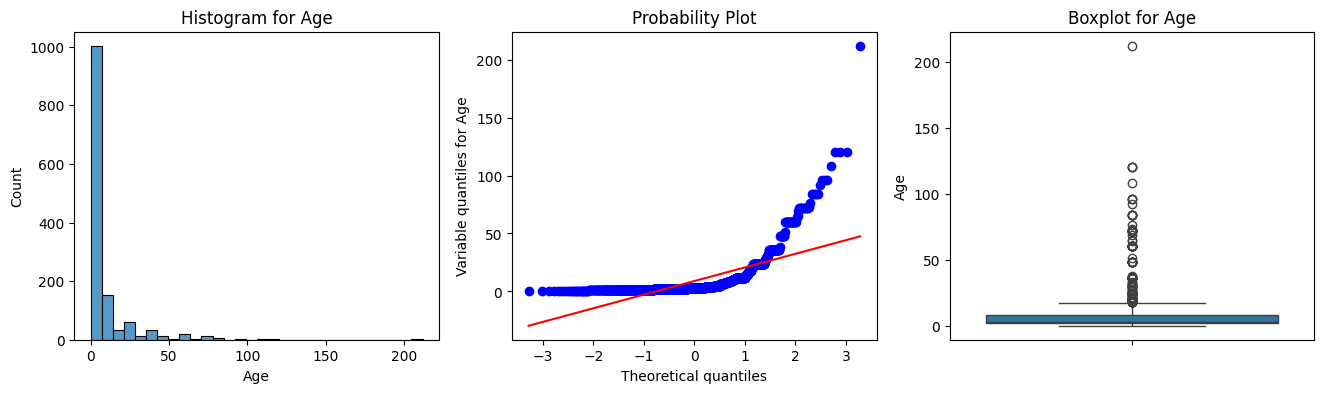

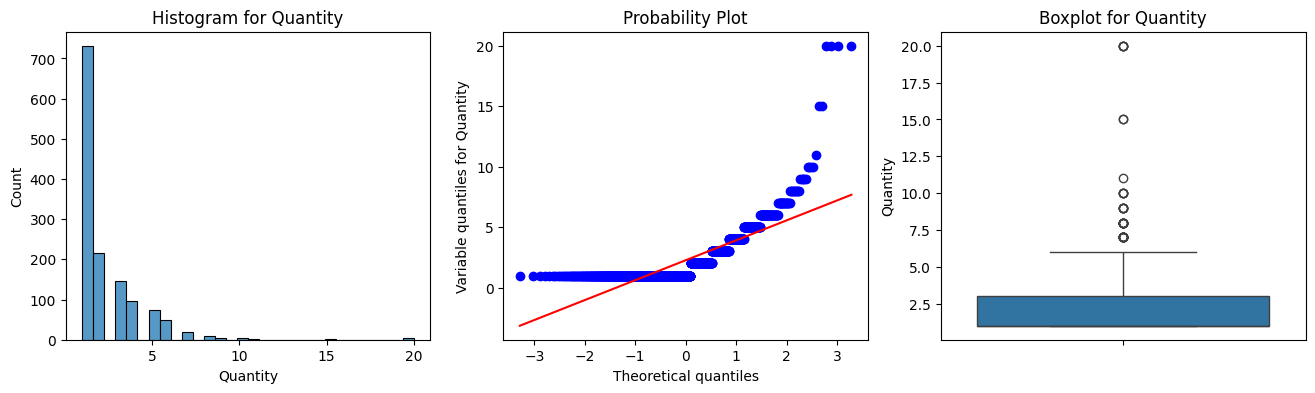

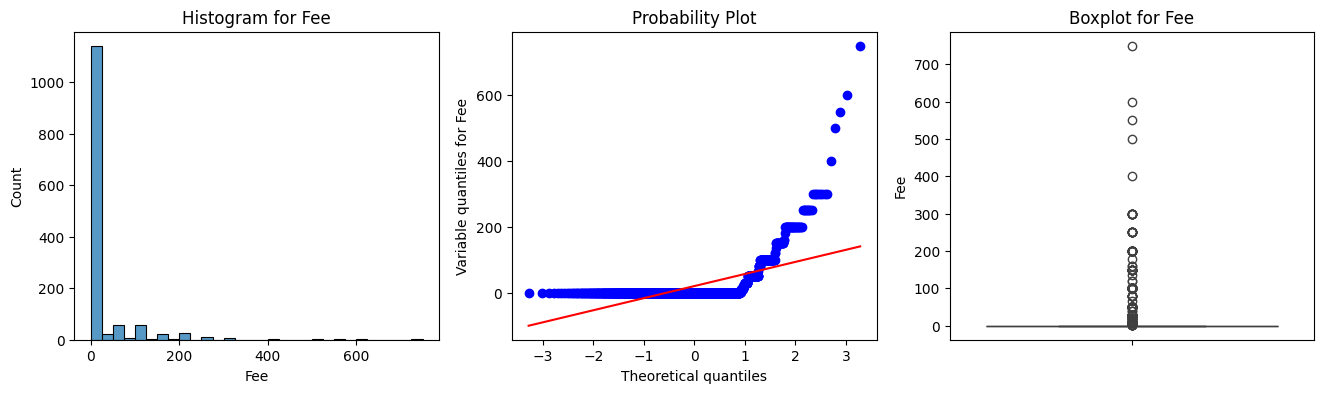

In [138]:
def diagnostic_plots(ds, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(ds[variable], bins=30)
    plt.title(f'Histogram for {variable}')

    plt.subplot(1, 3, 2)
    stats.probplot(ds[variable], dist="norm", plot=plt)
    plt.ylabel(f'Variable quantiles for {variable}')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=ds[variable])
    plt.title(f'Boxplot for {variable}')

    plt.show()

# Assuming 'ds' is the DataFrame name, not 'df'
for col in ['Age', 'Quantity', 'Fee']:
  diagnostic_plots(ds, col)

In [139]:
def find_skewed_boundaries(ds, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = ds[variable].quantile(0.75) - ds[variable].quantile(0.25)

    lower_boundary = ds[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = ds[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [140]:
# find limits for PeakCallsInOut

Age_upper_limit, Age_lower_limit = find_skewed_boundaries(ds_trimmed, 'Age', 4)
Age_upper_limit, Age_lower_limit

(32.0, -22.0)

In [141]:
outliers_Age = np.where(ds_trimmed['Age'] > Age_upper_limit, True,
                       np.where(ds_trimmed['Age'] < Age_lower_limit, True, False))

In [142]:
ds_trimmed = ds_trimmed.loc[~outliers_Age, ]

ds.shape, ds_trimmed.shape

((1356, 12), (1260, 247))

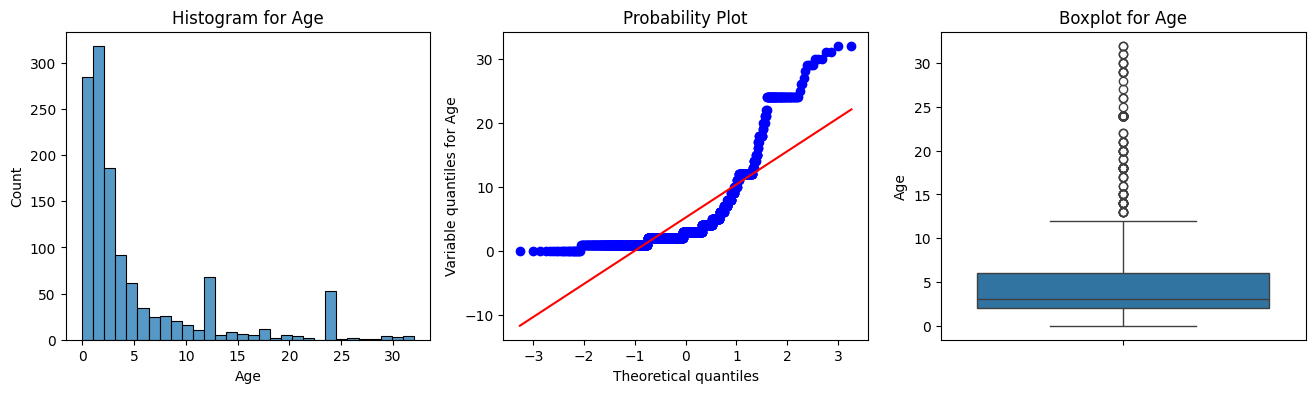

In [143]:
diagnostic_plots(ds_trimmed, 'Age')

In [144]:
ds_trimmed.describe()

,Unnamed: 0,Age,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,BreedName_x_Abyssinian,BreedName_x_American Curl,BreedName_x_American Shorthair,BreedName_x_American Wirehair,BreedName_x_Australian Kelpie,BreedName_x_Balinese,BreedName_x_Basset Hound,BreedName_x_Beagle,BreedName_x_Belgian Shepherd Dog Sheepdog,BreedName_x_Belgian Shepherd Malinois,BreedName_x_Bengal,BreedName_x_Birman,BreedName_x_Black Mouth Cur,BreedName_x_Border Collie,BreedName_x_Boxer,BreedName_x_British Shorthair,BreedName_x_Bull Terrier,BreedName_x_Bullmastiff,BreedName_x_Burmese,BreedName_x_Burmilla,BreedName_x_Calico,BreedName_x_Chihuahua,BreedName_x_Chinese Crested Dog,BreedName_x_Cocker Spaniel,BreedName_x_Corgi,BreedName_x_Dachshund,BreedName_x_Dalmatian,BreedName_x_Dilute Calico,BreedName_x_Dilute Tortoiseshell,BreedName_x_Doberman Pinscher,BreedName_x_Domestic Long Hair,BreedName_x_Domestic Medium Hair,BreedName_x_Domestic Short Hair,BreedName_x_Egyptian Mau,BreedName_x_Extra-Toes Cat (Hemingway Polydactyl),BreedName_x_Flat-coated Retriever,BreedName_x_German Shepherd Dog,BreedName_x_German Spitz,BreedName_x_Glen of Imaal Terrier,BreedName_x_Golden Retriever,BreedName_x_Great Dane,BreedName_x_Himalayan,BreedName_x_Husky,BreedName_x_Irish Terrier,BreedName_x_Jack Russell Terrier,BreedName_x_Japanese Bobtail,BreedName_x_Korat,BreedName_x_Kuvasz,BreedName_x_Labrador Retriever,BreedName_x_Lancashire Heeler,BreedName_x_Maine Coon,BreedName_x_Manx,BreedName_x_Mastiff,BreedName_x_Miniature Pinscher,BreedName_x_Missing,BreedName_x_Mixed Breed,BreedName_x_Norwegian Forest Cat,BreedName_x_Oriental Long Hair,BreedName_x_Oriental Short Hair,BreedName_x_Oriental Tabby,BreedName_x_Pekingese,BreedName_x_Persian,BreedName_x_Pit Bull Terrier,BreedName_x_Pixie-Bob,BreedName_x_Pointer,BreedName_x_Pomeranian,BreedName_x_Poodle,BreedName_x_Pug,BreedName_x_Ragdoll,BreedName_x_Rat Terrier,BreedName_x_Rhodesian Ridgeback,BreedName_x_Rottweiler,BreedName_x_Russian Blue,BreedName_x_Schnauzer,BreedName_x_Setter,BreedName_x_Shar Pei,BreedName_x_Shepherd,BreedName_x_Shetland Sheepdog Sheltie,BreedName_x_Shih Tzu,BreedName_x_Siamese,BreedName_x_Siberian,BreedName_x_Siberian Husky,BreedName_x_Silky Terrier,BreedName_x_Silver,BreedName_x_Singapura,BreedName_x_Snowshoe,BreedName_x_Spitz,BreedName_x_Tabby,BreedName_x_Terrier,BreedName_x_Tiger,BreedName_x_Torbie,BreedName_x_Tortoiseshell,BreedName_x_Toy Fox Terrier,BreedName_x_Tuxedo,BreedName_x_Whippet,BreedName_y_Abyssinian,BreedName_y_Afghan Hound,BreedName_y_American Curl,BreedName_y_American Shorthair,BreedName_y_Applehead Siamese,BreedName_y_Australian Cattle Dog/Blue Heeler,BreedName_y_Australian Terrier,BreedName_y_Basset Hound,BreedName_y_Beagle,BreedName_y_Bengal,BreedName_y_Birman,BreedName_y_Bluetick Coonhound,BreedName_y_Bobtail,BreedName_y_Border Collie,BreedName_y_British Shorthair,BreedName_y_Bullmastiff,BreedName_y_Burmese,BreedName_y_Calico,BreedName_y_Cavalier King Charles Spaniel,BreedName_y_Chartreux,BreedName_y_Cocker Spaniel,BreedName_y_Collie,BreedName_y_Dachshund,BreedName_y_Dalmatian,BreedName_y_Dilute Tortoiseshell,BreedName_y_Doberman Pinscher,BreedName_y_Domestic Long Hair,BreedName_y_Domestic Medium Hair,BreedName_y_Domestic Short Hair,BreedName_y_Egyptian Mau,BreedName_y_Exotic Shorthair,BreedName_y_Finnish Spitz,BreedName_y_Fox Terrier,BreedName_y_German Shepherd Dog,BreedName_y_German Shorthaired Pointer,BreedName_y_Golden Retriever,BreedName_y_Harrier,BreedName_y_Hound,BreedName_y_Husky,BreedName_y_Jack Russell Terrier,BreedName_y_Jack Russell Terrier (Parson Russell Terrier),BreedName_y_Japanese Bobtail,BreedName_y_Labrador Retriev

In [145]:
ds_trimmed['Age'].describe()

count    1260.000000
mean        5.206349
std         6.241267
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        32.000000
Name: Age, dtype: float64

In [146]:
ds_trimmed.describe()

,Unnamed: 0,Age,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,BreedName_x_Abyssinian,BreedName_x_American Curl,BreedName_x_American Shorthair,BreedName_x_American Wirehair,BreedName_x_Australian Kelpie,BreedName_x_Balinese,BreedName_x_Basset Hound,BreedName_x_Beagle,BreedName_x_Belgian Shepherd Dog Sheepdog,BreedName_x_Belgian Shepherd Malinois,BreedName_x_Bengal,BreedName_x_Birman,BreedName_x_Black Mouth Cur,BreedName_x_Border Collie,BreedName_x_Boxer,BreedName_x_British Shorthair,BreedName_x_Bull Terrier,BreedName_x_Bullmastiff,BreedName_x_Burmese,BreedName_x_Burmilla,BreedName_x_Calico,BreedName_x_Chihuahua,BreedName_x_Chinese Crested Dog,BreedName_x_Cocker Spaniel,BreedName_x_Corgi,BreedName_x_Dachshund,BreedName_x_Dalmatian,BreedName_x_Dilute Calico,BreedName_x_Dilute Tortoiseshell,BreedName_x_Doberman Pinscher,BreedName_x_Domestic Long Hair,BreedName_x_Domestic Medium Hair,BreedName_x_Domestic Short Hair,BreedName_x_Egyptian Mau,BreedName_x_Extra-Toes Cat (Hemingway Polydactyl),BreedName_x_Flat-coated Retriever,BreedName_x_German Shepherd Dog,BreedName_x_German Spitz,BreedName_x_Glen of Imaal Terrier,BreedName_x_Golden Retriever,BreedName_x_Great Dane,BreedName_x_Himalayan,BreedName_x_Husky,BreedName_x_Irish Terrier,BreedName_x_Jack Russell Terrier,BreedName_x_Japanese Bobtail,BreedName_x_Korat,BreedName_x_Kuvasz,BreedName_x_Labrador Retriever,BreedName_x_Lancashire Heeler,BreedName_x_Maine Coon,BreedName_x_Manx,BreedName_x_Mastiff,BreedName_x_Miniature Pinscher,BreedName_x_Missing,BreedName_x_Mixed Breed,BreedName_x_Norwegian Forest Cat,BreedName_x_Oriental Long Hair,BreedName_x_Oriental Short Hair,BreedName_x_Oriental Tabby,BreedName_x_Pekingese,BreedName_x_Persian,BreedName_x_Pit Bull Terrier,BreedName_x_Pixie-Bob,BreedName_x_Pointer,BreedName_x_Pomeranian,BreedName_x_Poodle,BreedName_x_Pug,BreedName_x_Ragdoll,BreedName_x_Rat Terrier,BreedName_x_Rhodesian Ridgeback,BreedName_x_Rottweiler,BreedName_x_Russian Blue,BreedName_x_Schnauzer,BreedName_x_Setter,BreedName_x_Shar Pei,BreedName_x_Shepherd,BreedName_x_Shetland Sheepdog Sheltie,BreedName_x_Shih Tzu,BreedName_x_Siamese,BreedName_x_Siberian,BreedName_x_Siberian Husky,BreedName_x_Silky Terrier,BreedName_x_Silver,BreedName_x_Singapura,BreedName_x_Snowshoe,BreedName_x_Spitz,BreedName_x_Tabby,BreedName_x_Terrier,BreedName_x_Tiger,BreedName_x_Torbie,BreedName_x_Tortoiseshell,BreedName_x_Toy Fox Terrier,BreedName_x_Tuxedo,BreedName_x_Whippet,BreedName_y_Abyssinian,BreedName_y_Afghan Hound,BreedName_y_American Curl,BreedName_y_American Shorthair,BreedName_y_Applehead Siamese,BreedName_y_Australian Cattle Dog/Blue Heeler,BreedName_y_Australian Terrier,BreedName_y_Basset Hound,BreedName_y_Beagle,BreedName_y_Bengal,BreedName_y_Birman,BreedName_y_Bluetick Coonhound,BreedName_y_Bobtail,BreedName_y_Border Collie,BreedName_y_British Shorthair,BreedName_y_Bullmastiff,BreedName_y_Burmese,BreedName_y_Calico,BreedName_y_Cavalier King Charles Spaniel,BreedName_y_Chartreux,BreedName_y_Cocker Spaniel,BreedName_y_Collie,BreedName_y_Dachshund,BreedName_y_Dalmatian,BreedName_y_Dilute Tortoiseshell,BreedName_y_Doberman Pinscher,BreedName_y_Domestic Long Hair,BreedName_y_Domestic Medium Hair,BreedName_y_Domestic Short Hair,BreedName_y_Egyptian Mau,BreedName_y_Exotic Shorthair,BreedName_y_Finnish Spitz,BreedName_y_Fox Terrier,BreedName_y_German Shepherd Dog,BreedName_y_German Shorthaired Pointer,BreedName_y_Golden Retriever,BreedName_y_Harrier,BreedName_y_Hound,BreedName_y_Husky,BreedName_y_Jack Russell Terrier,BreedName_y_Jack Russell Terrier (Parson Russell Terrier),BreedName_y_Japanese Bobtail,BreedName_y_Labrador Retriev

In [147]:
ds_trimmed.drop('Unnamed: 0', axis=1, inplace=True)

In [148]:
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
cols_to_scale = ['Age', 'Fee', 'Quantity']
ds_trimmed[cols_to_scale].describe()

,Age,Fee,Quantity
count,1260.000000,1260.000000,1260.000000
mean,5.206349,19.296032,2.311111
std,6.241267,58.797633,2.031922
min,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000
75%,6.000000,0.000000,3.000000
max,32.000000,750.000000,20.000000


In [149]:
scaler = MinMaxScaler()
ds_trimmed[cols_to_scale] = scaler.fit_transform(ds_trimmed[cols_to_scale])
ds_trimmed[cols_to_scale].describe()

,Age,Fee,Quantity
count,1260.000000,1260.000000,1260.000000
mean,0.162698,0.025728,0.069006
std,0.195040,0.078397,0.106943
min,0.000000,0.000000,0.000000
25%,0.062500,0.000000,0.000000
50%,0.093750,0.000000,0.000000
75%,0.187500,0.000000,0.105263
max,1.000000,1.000000,1.000000


In [150]:
cols_to_delete = [col for col in ds_trimmed.columns if str(col).startswith('BreedName')]
ds_trimmed = ds_trimmed.drop(cols_to_delete, axis=1)
ds_trimmed.to_csv('/content/drive/MyDrive/ІТ Смарт-систем/ПР2/variant_3_FullModified.csv', index=False)
ds_trimmed

,Name,Age,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,StateName_x_Johor,StateName_x_Kedah,StateName_x_Kelantan,StateName_x_Kuala Lumpur,StateName_x_Melaka,StateName_x_Negeri Sembilan,StateName_x_Pahang,StateName_x_Perak,StateName_x_Pulau Pinang,StateName_x_Sarawak,StateName_x_Selangor,StateName_x_Terengganu,Type_1,Type_2,Gender_1.0,Gender_2.0,Gender_3.0,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,Golden Tabby Girl,0.03125,0.000000,0.066667,41326,438a9bdce8ef4d5948fc40e422d34d0d,0,A cute tabby kitten looking for new home. She ...,dae13a47e,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Ogen & Oyen,0.06250,0.052632,0.000000,41326,15316b9044ea4f6a57f6cb4b45fc67aa,0,Ogen (male) & Oyen (female) are about 2 months...,718b14a08,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Noah And Nellie,0.06250,0.052632,0.000000,41326,2e4363f80f02bda5f2f8115b6ce6aef6,0,"Once again, thanks to petfinder, Noah and Nell...",4a590a1cc,5.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Money,0.03125,0.000000,0.000000,41326,5201c3e05aa6ff174b006c070e9a06b5,0,Please adopt this cute little kitten... I eant...,19982272a,4.0,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,Karlo,0.06250,0.000000,0.000000,41326,95481e953f8aed9ec3d16fc4509537e8,0,"Meet Karlo, brother of little Karla, the cutes...",f61c4cead,1.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1 Month Old Puppy,0.03125,0.000000,0.000000,41335,849d5c53eea804440adc2eebc4eecf4a,0,"To All Kind Hearted, Hi. I came across a litte...",474294e01,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1352,Love & Faith,0.34375,0.052632,0.000000,41335,29244d79de49a27256049d50b46843fb,0,Kuantan People............SOS Found these 2 lo...,e2f5253f7,1.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1353,9 Puppies For Adoption!,0.03125,0.421053,0.133333,41335,80ecb2b31b27d310c829d09e1570cef9,0,I have two litters of puppies for adoption.. T...,45d2ddcb8,5.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [151]:
ds_trimmed

,Name,Age,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,MaturitySize_1.0,MaturitySize_2.0,MaturitySize_3.0,MaturitySize_4.0,MaturitySize_Missing,ColorName_x_Black,ColorName_x_Brown,ColorName_x_Cream,ColorName_x_Golden,ColorName_x_Yellow,ColorName_y_Brown,ColorName_y_Cream,ColorName_y_Golden,ColorName_y_Gray,ColorName_y_Yellow,ColorName_Cream,ColorName_Golden,ColorName_Gray,ColorName_Missing,ColorName_White,ColorName_Yellow,StateName_x_Johor,StateName_x_Kedah,StateName_x_Kelantan,StateName_x_Kuala Lumpur,StateName_x_Melaka,StateName_x_Negeri Sembilan,StateName_x_Pahang,StateName_x_Perak,StateName_x_Pulau Pinang,StateName_x_Sarawak,StateName_x_Selangor,StateName_x_Terengganu,Type_1,Type_2,Gender_1.0,Gender_2.0,Gender_3.0,FurLength_1,FurLength_2,FurLength_3,Vaccinated_1,Vaccinated_2,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
0,Golden Tabby Girl,0.03125,0.000000,0.066667,41326,438a9bdce8ef4d5948fc40e422d34d0d,0,A cute tabby kitten looking for new home. She ...,dae13a47e,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Ogen & Oyen,0.06250,0.052632,0.000000,41326,15316b9044ea4f6a57f6cb4b45fc67aa,0,Ogen (male) & Oyen (female) are about 2 months...,718b14a08,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Noah And Nellie,0.06250,0.052632,0.000000,41326,2e4363f80f02bda5f2f8115b6ce6aef6,0,"Once again, thanks to petfinder, Noah and Nell...",4a590a1cc,5.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Money,0.03125,0.000000,0.000000,41326,5201c3e05aa6ff174b006c070e9a06b5,0,Please adopt this cute little kitten... I eant...,19982272a,4.0,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,Karlo,0.06250,0.000000,0.000000,41326,95481e953f8aed9ec3d16fc4509537e8,0,"Meet Karlo, brother of little Karla, the cutes...",f61c4cead,1.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1 Month Old Puppy,0.03125,0.000000,0.000000,41335,849d5c53eea804440adc2eebc4eecf4a,0,"To All Kind Hearted, Hi. I came across a litte...",474294e01,6.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1352,Love & Faith,0.34375,0.052632,0.000000,41335,29244d79de49a27256049d50b46843fb,0,Kuantan People............SOS Found these 2 lo...,e2f5253f7,1.0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1353,9 Puppies For Adoption!,0.03125,0.421053,0.133333,41335,80ecb2b31b27d310c829d09e1570cef9,0,I have two litters of puppies for adoption.. T...,45d2ddcb8,5.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,